# Pluck Points from Lat/Lon Grid
This builds on my example from https://stackoverflow.com/questions/58758480/xarray-select-nearest-lat-lon-with-multi-dimension-coordinates

In [1]:
from herbie.archive import Herbie
from metpy.units import units
import matplotlib.pyplot as plt
from toolbox.cartopy_tools import pc, common_features, ccrs

/p/home/blaylock/BB_python/Carpenter_Workshop/toolbox/cartopy_tools_OLD.py:37: UserWarning: Migrate to new `cartopy_tools` for latest updates and features.
  warnings.warn("Migrate to new `cartopy_tools` for latest updates and features.")
/p/home/blaylock/BB_python/Carpenter_Workshop/toolbox/cartopy_tools.py:38: UserWarning: Migrate to `cartopy_tools2` for latest updates and features.
  warnings.warn("Migrate to `cartopy_tools2` for latest updates and features.")
/p/home/blaylock/BB_python/Carpenter_Workshop/toolbox/cartopy_tools.py:1015: AccessorRegistrationWarning: registration of accessor <class 'toolbox.cartopy_tools.xr_to_cartopy'> under name 'xmap' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  class xr_to_cartopy:


In [3]:
H = Herbie('2021-9-23')
ds = H.xarray('TMP:2 m')

/p/home/blaylock/BB_python/Herbie/herbie/archive.py:205: UserWarning: `product` not specified. Will use ["sfc"].
  warnings.warn(f'`product` not specified. Will use ["{self.product}"].')


🏋🏻‍♂️ Found 2021-Sep-23 00:00 UTC F00 [HRRR] [product=sfc] GRIB2 file from aws and index file from aws.                                                                                                                                                       
📇 Download subset: [HRRR] model [sfc] product run at 2021-Sep-23 00:00 UTC F00                                                            
 cURL from https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20210923/conus/hrrr.t00z.wrfsfcf00.grib2
   1: GRIB_message=71  TMP:2 m above ground:anl


In [4]:
# Parse the CF grid_mapping
ds = ds.metpy.parse_cf()

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


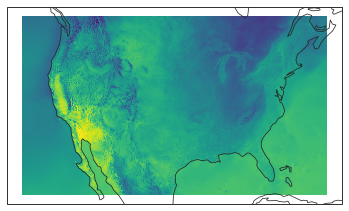

In [5]:
ax = common_features(crs=ds['t2m'].metpy_crs.item().to_cartopy()).ax
ax.pcolormesh(ds.longitude, ds.latitude, ds.t2m, transform=pc)

In [6]:
# Convert lat/lon coordinates to y and x in the grid dimension
# (have to set tolerance higher than 1 m for the HRRR dataset)
ds2 = ds['t2m'].metpy.assign_y_x(tolerance=5*units.km)

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.8/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "t2m".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


In [8]:
# We want to index the dataset at a single point.
# We can do this by transforming a lat/lon point to the grid location
lon, lat = ax.projection.transform_point(-115, 45, ccrs.PlateCarree())
lon, lat

(-1376827.3583185042, 855647.5477220374)

In [9]:
# Now select the x, y location for the point in grid coordinate
point = ds2.sel(x=lon, y=lat, method='nearest')
point

<xarray.DataArray 't2m' ()>
array(290.5878, dtype=float32)
Coordinates:
    time               datetime64[ns] 2021-09-23
    step               timedelta64[ns] 00:00:00
    heightAboveGround  float64 2.0
    latitude           float64 45.0
    longitude          float64 245.0
    valid_time         datetime64[ns] 2021-09-23
    metpy_crs          object Projection: lambert_conformal_conic
    y                  float64 8.542e+05
    x                  float64 -1.378e+06
Attributes: (12/37)
    GRIB_paramId:                             167
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1905141
    GRIB_typeOfLevel:                         heightAboveGround
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_stepRange:                           0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            air_temperature
    grid_mapping:                             hrrr_projection

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


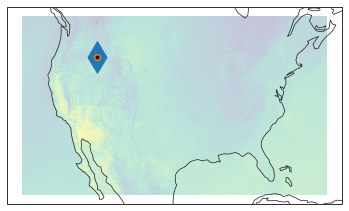

In [12]:
# Plot the gridded data and the points
ax = common_features(crs=ds['t2m'].metpy_crs.item().to_cartopy()).ax
ax.pcolormesh(ds.longitude, ds.latitude, ds.t2m, transform=pc, alpha=.3)

# Plot point in x, y grid coordinate
ax.scatter(point.x, point.y, s=500, marker='d')

# Plot the point in lat/lon in degrees
ax.scatter(point.longitude, point.latitude, transform=ccrs.PlateCarree())

# Plot the reqyested point in lat/lon in degrees
ax.scatter(-115, 45, transform=ccrs.PlateCarree(), marker='.', color='k')
